## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/googlenet/fashion_mnist/'
print('The data path is:', data_path)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist


### extract data

In [3]:
batch_sizes = [64]
epochs = [1]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E1_B64_R0']
The folder list is: ['E1_B64_R0']
The common folders are: ['E1_B64_R0']
1


### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
datafolder = data_path / common_folders[0]
print('The data folder is:', datafolder)
# find the files in the data folder
files = os.listdir(datafolder)
print('The files are:', files)


The data folder is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist/E1_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']


In [6]:
# read all the files in the common folders
LayersTime = np.load(datafolder / 'Layers_time.npy', allow_pickle=True)
TrainPartTime = np.load(datafolder / 'Train_part_time.npy', allow_pickle=True)
EpochTime = np.load(datafolder / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy = np.load(datafolder / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc = np.load(datafolder / 'Train_acc.npy', allow_pickle=True)
TestAcc = np.load(datafolder / 'Test_acc.npy', allow_pickle=True)

In [10]:
print('The layers time is:', LayersTime)
print('The train part time is:', TrainPartTime)
print('The epoch time is:', EpochTime)
print('The epoch energy is:', EpochEnergy)
print('The train accuracy is:', TrainAcc)
print('The test accuracy is:', TestAcc)

The layers time is: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
The train part time is: [[ 2.12790871]
 [47.1796453 ]
 [ 6.11476302]
 [ 8.7417748 ]]
The epoch time is: [156.36709213]
The epoch energy is: [[array([26.78, 26.63, 26.71, 52.17, 94.9 , 94.94, 94.75, 94.95, 94.64,
         94.66, 94.56, 94.62, 94.68, 94.47, 94.29, 94.51, 94.44, 94.66,
         94.32, 94.59, 94.6 , 94.73, 94.91, 94.72, 94.63, 94.73, 94.48,
         94.67, 94.96, 94.75, 95.03, 94.67, 95.01, 94.64, 94.66, 94.51,
         94.76, 94.34, 94.56, 94.51, 94.75, 94.64, 94.71, 94.82, 94.81,
         94.54, 94.75, 94.76, 94.94, 94.33, 94.72, 94.67, 94.41, 94.61,
         94.29, 94.43, 94.33, 94.35, 94.74, 94.58, 94.64, 94.8 , 94.67,
         94.89, 94.79, 94.64, 94.85, 94.41, 94.5 , 94.52, 94.62, 94.63,
         94.59, 94.59, 94.79, 94.78, 94.57, 94.52, 94.52, 94.63, 94.47,
         94.53, 94.56, 94.66, 94.57, 94.72, 94.6 , 94.68, 94.79, 

#### LayersTime

In [7]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0_Cp1_1', 'S2_I0_Cp2_1', 'S2_I0_Cp2_2', 'S2_I0_Cp3_1', 'S2_I0_Cp3_2', 'S2_I0_Mp4_1', 'S2_I0_Cp4_2', 'S2_I1_Cp1_1', 'S2_I1_Cp2_1', 'S2_I1_Cp2_2', 'S2_I1_Cp3_1', 'S2_I1_Cp3_2', 'S2_I1_Mp4_1', 'S2_I1_Cp4_2', 'S2_M2', 'S3_I0_Cp1_1', 'S3_I0_Cp2_1', 'S3_I0_Cp2_2', 'S3_I0_Cp3_1', 'S3_I0_Cp3_2', 'S3_I0_Mp4_1', 'S3_I0_Cp4_2', 'S3_I1_Cp1_1', 'S3_I1_Cp2_1', 'S3_I1_Cp2_2', 'S3_I1_Cp3_1', 'S3_I1_Cp3_2', 'S3_I1_Mp4_1', 'S3_I1_Cp4_2', 'S3_I2_Cp1_1', 'S3_I2_Cp2_1', 'S3_I2_Cp2_2', 'S3_I2_Cp3_1', 'S3_I2_Cp3_2', 'S3_I2_Mp4_1', 'S3_I2_Cp4_2', 'S3_I3_Cp1_1', 'S3_I3_Cp2_1', 'S3_I3_Cp2_2', 'S3_I3_Cp3_1', 'S3_I3_Cp3_2', 'S3_I3_Mp4_1', 'S3_I3_Cp4_2', 'S3_I4_Cp1_1', 'S3_I4_Cp2_1', 'S3_I4_Cp2_2', 'S3_I4_Cp3_1', 'S3_I4_Cp3_2', 'S3_I4_Mp4_1', 'S3_I4_Cp4_2', 'S3_M5', 'S4_I0_Cp1_1', 'S4_I0_Cp2_1', 'S4_I0_Cp2_2', 'S4_I0_Cp3_1', 'S4_I0_Cp3_2', 'S4_I0_Mp4_1', 'S4_I0_Cp4_2', 'S4_I1_Cp1_1', 'S4_I1_Cp2_1', 'S4_I1_Cp2_2', 'S4_I1_Cp3_1', 'S4_I1_Cp3_2', 'S4_I1_Mp4_1', 'S4_I1_Cp4_2', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 75


In [8]:
print('The shape of LayersTime is:', LayersTime.shape)
print(LayersTime)

The shape of LayersTime is: (21, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


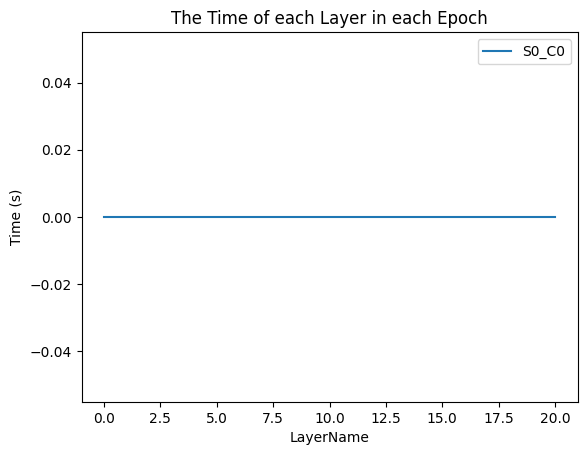

In [9]:
# plot the LayersTime of each epoch using dot plot
fig, ax = plt.subplots()
for i in range(LayersTime.shape[1]):    
    ax.plot(LayersTime[:, i], label=LayersName[i])
ax.set_xlabel('LayerName')
ax.set_ylabel('Time (s)')
ax.set_title('The Time of each Layer in each Epoch')
ax.legend()
plt.show()